# **Problem Statement**

We will explore from this [dataset](https://www.kaggle.com/c/GiveMeSomeCredit/data), we learn about credit scoring using simple technique, logistic regression. Information dataset will show here, below:

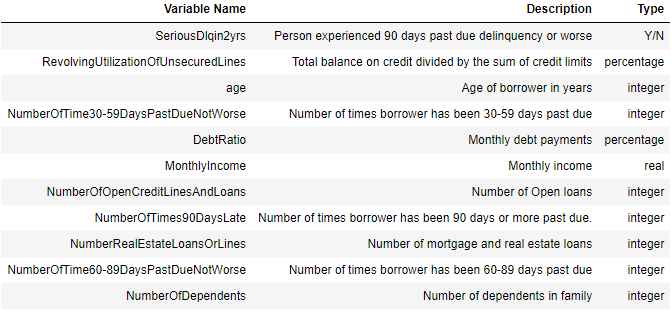

In [1]:
# generate dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d brycecf/give-me-some-credit-dataset

 97% 5.00M/5.16M [00:00<00:00, 20.0MB/s]
100% 5.16M/5.16M [00:00<00:00, 20.5MB/s]


In [2]:
# unzipping dataset
!unzip "give-me-some-credit-dataset.zip"

Archive:  give-me-some-credit-dataset.zip
  inflating: Data Dictionary.xls     
  inflating: cs-test.csv             
  inflating: cs-training.csv         
  inflating: sampleEntry.csv         


In [72]:
# import useful library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [13]:
# prepare dataset
df_train = pd.read_csv("cs-training.csv", index_col=0)
df_test = pd.read_csv("cs-test.csv", index_col=0)
print("Shape of dataframe training: ", df_train.shape)
print("Shape of dataframe testing: ", df_test.shape)

Shape of dataframe training:  (150000, 11)
Shape of dataframe testing:  (101503, 11)


In [18]:
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [19]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [16]:
# check null dataset in Training
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [17]:
# check null dataset in Training
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [20]:
# handling NA dataset
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [21]:
print("Shape of dataframe training after handling: ", df_train.shape)
print("Shape of dataframe testing after handling: ", df_test.shape)

Shape of dataframe training after handling:  (120269, 11)
Shape of dataframe testing after handling:  (0, 11)


In this part, we only use training dataset and forget testing dataset. I will show handling testing dataset in next notebook.

In [36]:
# splitting dataset
X = df_train.drop('SeriousDlqin2yrs', axis=1)
y = df_train['SeriousDlqin2yrs']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.2, random_state=11)

In [37]:
# basic logistic regression model
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# predict model
pred_y = model.predict(test_X)

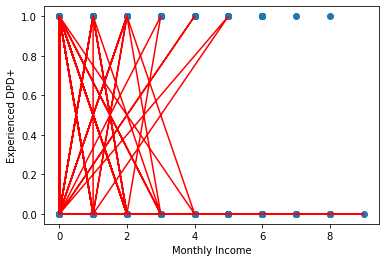

In [39]:
# create class prediction
plt.scatter(test_X.NumberOfDependents, test_y)
plt.plot(test_X.NumberOfDependents, pred_y, color='red')
plt.xlabel("Monthly Income")
plt.ylabel("Experienced DPD+");

In [40]:
# coefficient model
print(model.coef_, model.intercept_)

[[ 1.46207716e-04 -5.05931470e-02  2.21729803e-01 -1.75483394e-04
  -7.10725205e-05  2.51439270e-02  2.47289008e-02  1.11449615e-01
  -2.00710489e-01  9.83699823e-02]] [-0.09132991]


In [73]:
logodds = model.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.47718338])

In [42]:
# calculate accuracy
score = accuracy_score(test_y, pred_y)
score

0.931778498378648

In [46]:
# FPR, TPR, THRESH for model
fpr1, tpr1, thresh1 = roc_curve(test_y, model.predict_proba(test_X)[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

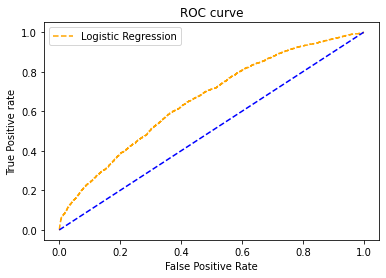

In [47]:
# Plot ROC
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best');

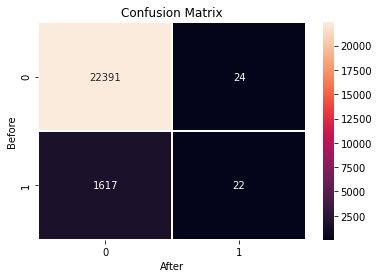

In [70]:
# Confusion matrix
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(test_y, pred_y), linewidths=1, annot=True, fmt='g')
plt.ylabel("Before")
plt.xlabel("After");

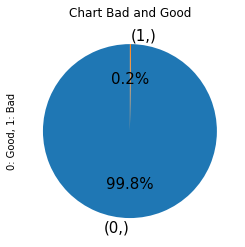

In [68]:
# Percentage Good and Bad
pd.DataFrame(pred_y).value_counts().plot(title="Chart Bad and Good", 
                                         kind='pie', autopct='%1.1f%%', 
                                         startangle=90, fontsize=15)
plt.ylabel("0: Good, 1: Bad");